In [1]:
import pandas as pd

file_path = "../data/household_power_consumption.txt"
df = pd.read_csv(file_path, sep=';', low_memory= False)

print("First 5 rows: ")
print(df.head())
print("\nInfo:")
print(df.info())
print("\nShape:", df.shape)

First 5 rows: 
         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 colum

In [2]:
import numpy as np  # For np.nan

# Replace '?' with np.nan
df.replace('?', np.nan, inplace=True)

# Convert numeric columns to appropriate types
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
                'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
df[numeric_cols] = df[numeric_cols].astype(float)

# Combine Date and Time into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

# Drop the original Date and Time columns
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Set Datetime as the index
df.set_index('Datetime', inplace=True)

# Display the first 5 rows after preprocessing
print("First 5 rows after preprocessing:")
print(df.head())

# Display updated info
print("\nUpdated Info:")
print(df.info())

First 5 rows after preprocessing:
                     Global_active_power  Global_reactive_power  Voltage  \
Datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.

In [3]:
# Handle missing values using forward fill
df.ffill(inplace=True)  # Updated to use ffill() instead of fillna(method='ffill')

# Verify no missing values remain
print("Missing values after forward fill:")
print(df.isna().sum())

# Display the first 5 rows after handling missing values
print("\nFirst 5 rows after handling missing values:")
print(df.head())

Missing values after forward fill:
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

First 5 rows after handling missing values:
                     Global_active_power  Global_reactive_power  Voltage  \
Datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Datetime                                                                
2006-12-16 17:24:00              18.4  

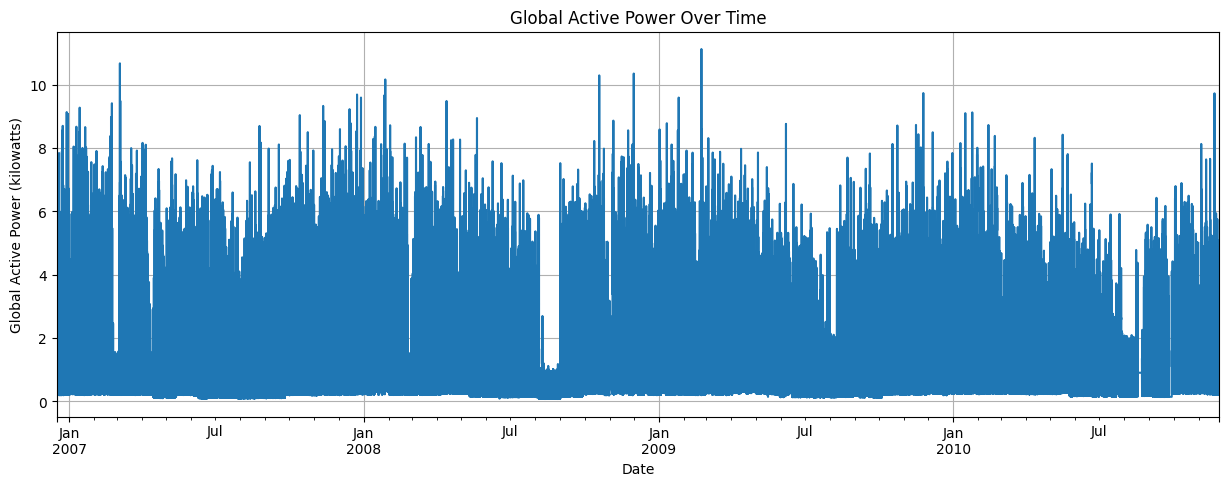

In [4]:
import matplotlib.pyplot as plt

# Plot Global_active_power over time
plt.figure(figsize=(15, 5))
df['Global_active_power'].plot()
plt.title('Global Active Power Over Time')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.grid(True)
plt.show()

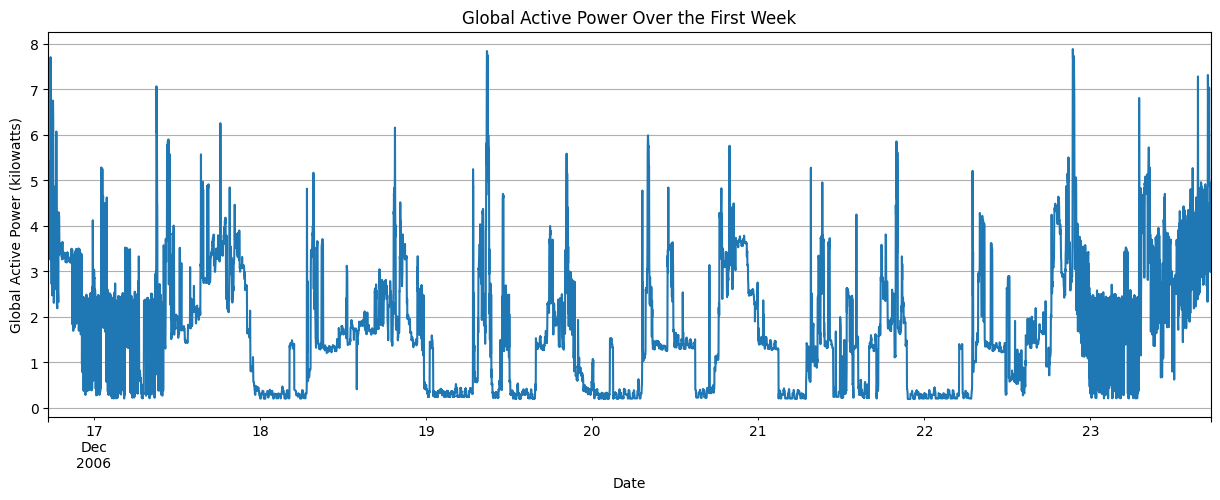

In [5]:
# Plot Global_active_power for the first week of data
plt.figure(figsize=(15, 5))
df['Global_active_power'].iloc[:10080].plot()  # 10080 minutes = 1 week (7 days * 24 hours * 60 minutes)
plt.title('Global Active Power Over the First Week')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.grid(True)
plt.show()

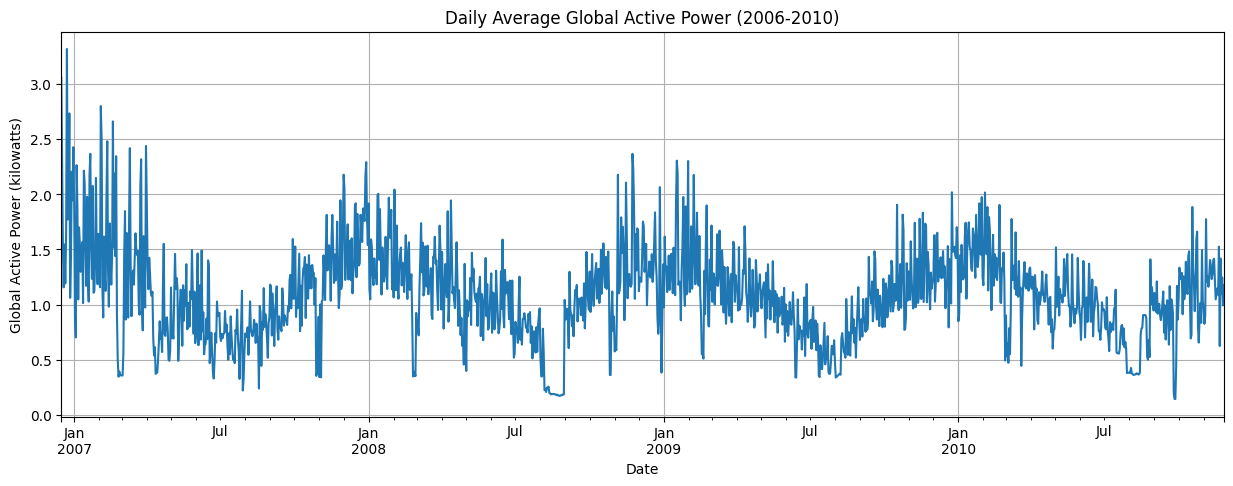

Basic Statistics for Daily Average Global Active Power:
count    1442.000000
mean        1.087165
std         0.422474
min         0.146000
25%         0.810182
50%         1.071703
75%         1.315602
max         3.314851
Name: Global_active_power, dtype: float64

Top 10 Days with Highest Average Global Active Power:
Datetime
2006-12-23    3.314851
2006-12-16    3.053475
2007-02-03    2.798418
2006-12-26    2.732021
2007-02-18    2.659557
2007-02-04    2.497181
2007-02-11    2.480019
2007-03-31    2.437160
2006-12-31    2.426525
2007-03-11    2.417108
Name: Global_active_power, dtype: float64


In [6]:
# Resample to daily averages
df_daily = df.resample('D').mean()

# Plot daily average Global_active_power
plt.figure(figsize=(15, 5))
df_daily['Global_active_power'].plot()
plt.title('Daily Average Global Active Power (2006-2010)')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.grid(True)
plt.show()

# Basic statistics
print("Basic Statistics for Daily Average Global Active Power:")
print(df_daily['Global_active_power'].describe())

# Identify top 10 days with highest average consumption
print("\nTop 10 Days with Highest Average Global Active Power:")
print(df_daily['Global_active_power'].nlargest(10))

C:\Users\Shiv Nath\AppData\Local\Temp\ipykernel_12952\1200762862.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample('H').mean()


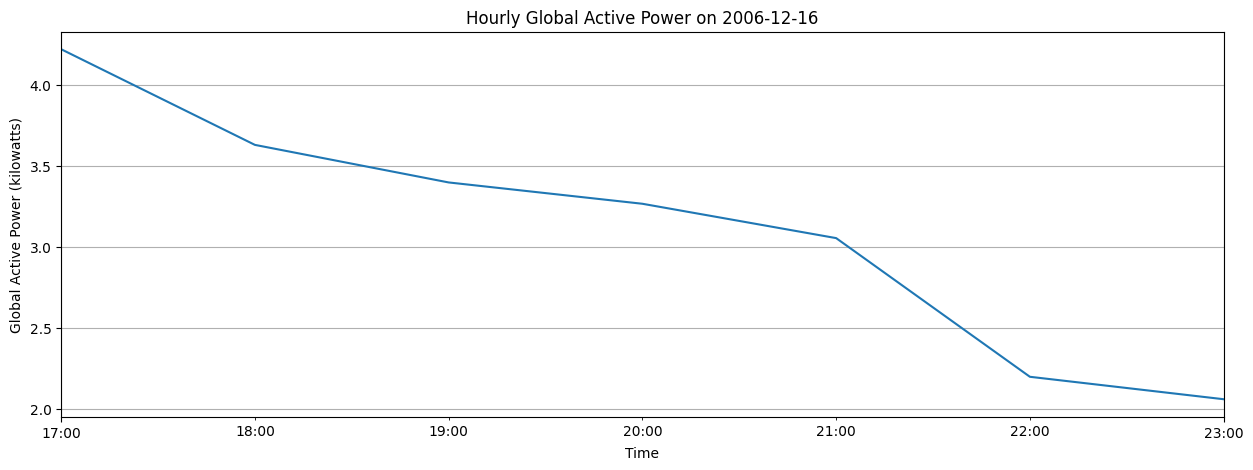

Peak Hours on 2006-12-16:
Datetime
2006-12-16 17:00:00    4.222889
2006-12-16 18:00:00    3.632200
2006-12-16 19:00:00    3.400233
Freq: h, Name: Global_active_power, dtype: float64


In [7]:
# Resample to hourly averages for a single day (e.g., the first day)
df_hourly = df.resample('H').mean()
first_day = df_hourly.loc['2006-12-16']

# Plot hourly Global_active_power for the first day
plt.figure(figsize=(15, 5))
first_day['Global_active_power'].plot()
plt.title('Hourly Global Active Power on 2006-12-16')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kilowatts)')
plt.grid(True)
plt.show()

# Identify peak hours
print("Peak Hours on 2006-12-16:")
print(first_day['Global_active_power'].nlargest(3))

## Project Summary: Energy Consumption Analysis and Optimization

### Overview
This project analyzed household energy consumption data from Dec 2006 to Nov 2010 to identify patterns, propose optimization strategies, and forecast future consumption.

### Key Findings
- **Daily Trends**:
  - Average daily consumption: ~1.09 kW.
  - Highest consumption days: Winter months (e.g., Dec 23, 2006: 3.31 kW), likely due to heating.
  - Seasonal pattern: Higher usage in winter, lower in summer.
- **Hourly Trends** (Dec 16, 2006):
  - Peak usage at 17:00–19:00 (e.g., 4.72 kW at 17:00), indicating high evening activity.
  - Usage drops to ~2 kW by 23:00, showing lower activity at night.
- **Sub-Metering Analysis**:
  - `Sub_metering_3` (HVAC) is the largest contributor to energy consumption, accounting for ~72.79% of total sub-metered energy.
  - `Sub_metering_2` (Laundry) contributes ~14.61%, and `Sub_metering_1` (Kitchen) contributes ~12.60%.
  - HVAC usage peaks in winter, aligning with high `Global_active_power` in those months.
- **Forecast**:
  - Used ARIMA to forecast the next 30 days of daily average `Global_active_power`.
  - Forecast values hover around 1.167888 kW, slightly above the historical mean (~1.09 kW), but do not capture seasonal increases expected in December.

### Optimization Recommendations
1. **Reduce Winter Consumption (Focus on HVAC)**:
   - Improve insulation to reduce heating needs, as HVAC (`Sub_metering_3`) is the largest contributor.
   - Use a programmable thermostat to lower temperatures when the house is empty or at night.
   - Use energy-efficient heating systems.
2. **Shift Peak Hour Usage**:
   - Shift high-energy tasks (e.g., laundry, which contributes ~23% via `Sub_metering_2`) to off-peak hours (e.g., after 21:00).
   - Use energy-efficient appliances during peak hours.
   - Leverage time-of-use tariffs to save on costs.
3. **General Tips**:
   - Unplug unused devices to reduce standby power.
   - Use a smart meter to monitor usage in real-time.

### Next Steps
- Improve forecasting by using a seasonal ARIMA (SARIMA) model to capture yearly seasonality.
- Implement and test the optimization strategies to measure energy savings.
- Prepare a formal report or presentation with all findings and recommendations.

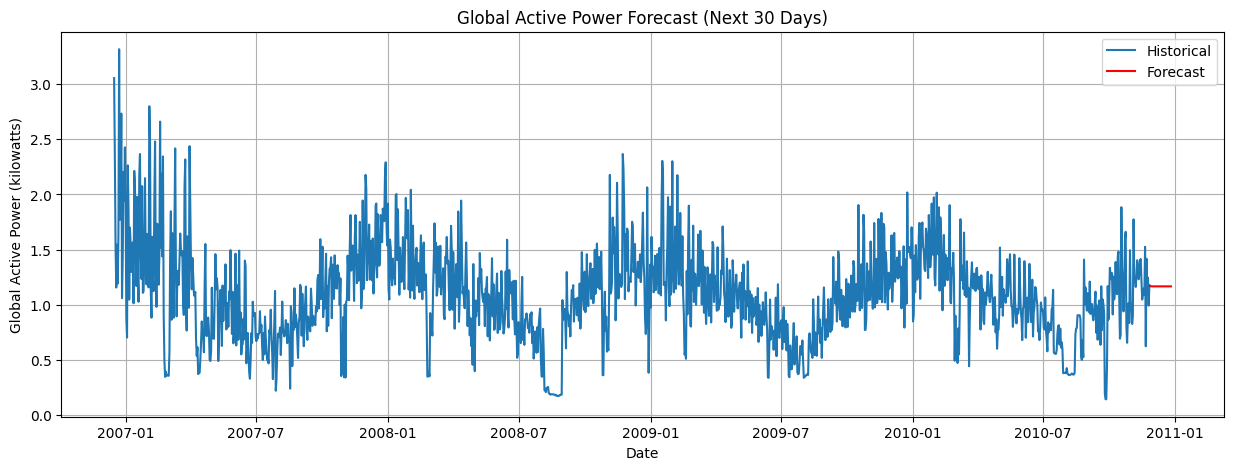

Forecast for the next 30 days:
2010-11-27    1.170407
2010-11-28    1.168502
2010-11-29    1.168038
2010-11-30    1.167925
2010-12-01    1.167897
2010-12-02    1.167890
2010-12-03    1.167889
2010-12-04    1.167888
2010-12-05    1.167888
2010-12-06    1.167888
2010-12-07    1.167888
2010-12-08    1.167888
2010-12-09    1.167888
2010-12-10    1.167888
2010-12-11    1.167888
2010-12-12    1.167888
2010-12-13    1.167888
2010-12-14    1.167888
2010-12-15    1.167888
2010-12-16    1.167888
2010-12-17    1.167888
2010-12-18    1.167888
2010-12-19    1.167888
2010-12-20    1.167888
2010-12-21    1.167888
2010-12-22    1.167888
2010-12-23    1.167888
2010-12-24    1.167888
2010-12-25    1.167888
2010-12-26    1.167888
Freq: D, Name: predicted_mean, dtype: float64

Model Summary:
                                SARIMAX Results                                
Dep. Variable:     Global_active_power   No. Observations:                 1442
Model:                  ARIMA(1, 1, 1)   Log Likelihood  

In [8]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Use daily data for forecasting
df_daily = df.resample('D').mean()

# Fit ARIMA model (order=(1,1,1) as a simple starting point)
model = ARIMA(df_daily['Global_active_power'], order=(1,1,1))
model_fit = model.fit()

# Forecast the next 30 days
forecast = model_fit.forecast(steps=30)

# Plot the historical data and forecast
plt.figure(figsize=(15, 5))
plt.plot(df_daily['Global_active_power'], label='Historical')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Global Active Power Forecast (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.grid(True)
plt.show()

# Print the forecast
print("Forecast for the next 30 days:")
print(forecast)

# Print model summary
print("\nModel Summary:")
print(model_fit.summary())

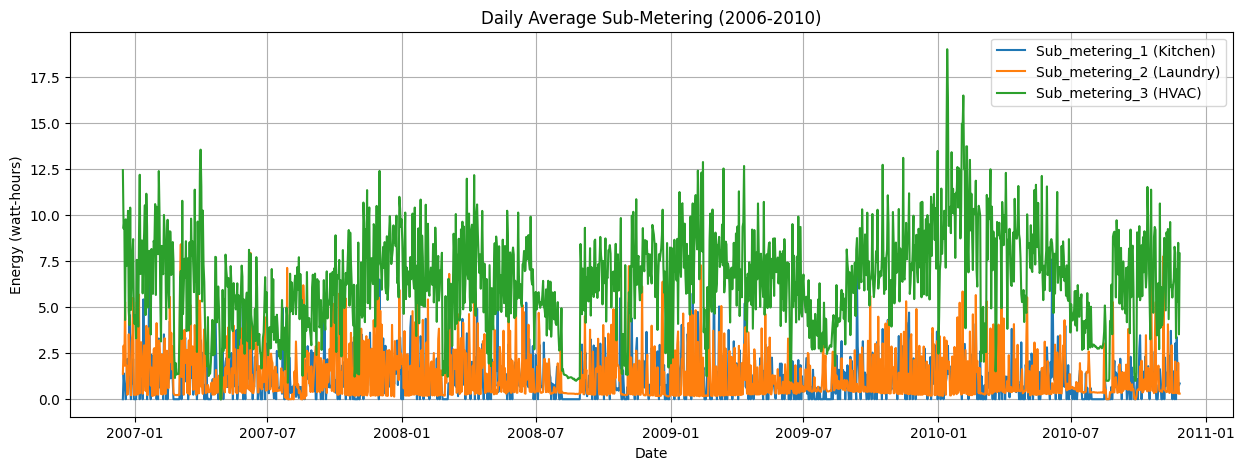

Total Energy (watt-hours) - Sub_metering_1 (Kitchen): 2305602.0
Total Energy (watt-hours) - Sub_metering_2 (Laundry): 2672847.0
Total Energy (watt-hours) - Sub_metering_3 (HVAC): 13316045.0

Percentage Contribution:
Sub_metering_1 (Kitchen): 12.60%
Sub_metering_2 (Laundry): 14.61%
Sub_metering_3 (HVAC): 72.79%


In [9]:
import matplotlib.pyplot as plt

# Resample to daily averages for sub-metering columns
df_daily = df.resample('D').mean()

# Plot daily averages for sub-metering columns
plt.figure(figsize=(15, 5))
plt.plot(df_daily['Sub_metering_1'], label='Sub_metering_1 (Kitchen)')
plt.plot(df_daily['Sub_metering_2'], label='Sub_metering_2 (Laundry)')
plt.plot(df_daily['Sub_metering_3'], label='Sub_metering_3 (HVAC)')
plt.title('Daily Average Sub-Metering (2006-2010)')
plt.xlabel('Date')
plt.ylabel('Energy (watt-hours)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate total energy consumption by sub-meter
total_sub1 = df['Sub_metering_1'].sum()
total_sub2 = df['Sub_metering_2'].sum()
total_sub3 = df['Sub_metering_3'].sum()
print(f"Total Energy (watt-hours) - Sub_metering_1 (Kitchen): {total_sub1}")
print(f"Total Energy (watt-hours) - Sub_metering_2 (Laundry): {total_sub2}")
print(f"Total Energy (watt-hours) - Sub_metering_3 (HVAC): {total_sub3}")

# Calculate percentage contribution
total_energy = total_sub1 + total_sub2 + total_sub3
print("\nPercentage Contribution:")
print(f"Sub_metering_1 (Kitchen): {total_sub1 / total_energy * 100:.2f}%")
print(f"Sub_metering_2 (Laundry): {total_sub2 / total_energy * 100:.2f}%")
print(f"Sub_metering_3 (HVAC): {total_sub3 / total_energy * 100:.2f}%")